In [1]:
# 1. Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
try:
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    script_dir = os.getcwd() 

# Define the path to the data folder
parent_dir = os.path.dirname(script_dir)
data_folder = os.path.join(parent_dir, 'data')
print(f"Data folder located at: {data_folder}")

Data folder located at: d:\Github\Deloitte-Machine-Learning-Challenge\data


In [2]:
def load_csv_file(file_path):
    """Loads a CSV file if it exists and returns the DataFrame."""
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        return df
    else:
        print(f"File not found: {file_path}")
        return None
train_csv = os.path.join(data_folder, 'train.csv')
test_csv = os.path.join(data_folder, 'test.csv')

# Load datasets
train_df = load_csv_file(train_csv)
test_df = load_csv_file(test_csv)
# Display preview of training data
if train_df is not None:
    print("Training Data Preview:")
    print(train_df.head())


Training Data Preview:
         ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  65087372        10000          32236             12329.36286    59   
1   1450153         3609          11940             12191.99692    59   
2   1969101        28276           9311             21603.22455    59   
3   6651430        11170           6954             17877.15585    59   
4  14354669        16890          13226             13539.92667    59   

  Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  ...  \
0     BAT2522922      11.135007     B        C4            MORTGAGE  ...   
1     BAT1586599      12.237563     C        D3                RENT  ...   
2     BAT2136391      12.545884     F        D4            MORTGAGE  ...   
3     BAT2428731      16.731201     C        C3            MORTGAGE  ...   
4     BAT5341619      15.008300     C        D4            MORTGAGE  ...   

    Recoveries Collection Recovery Fee Collection 12 months Medical  \
0     2.49

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [4]:
train_df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [5]:
test_df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,2.891300e+04,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,...,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,2.891300e+04,28913.000000,0.0
mean,2.944966e+07,16404.027462,15619.911113,14741.536698,54.543078,12.187577,79983.752348,22.159266,0.332065,0.276900,...,0.922863,50.624944,1.393220,0.019576,65.007574,0.000968,159.747553,1.530975e+05,25013.808425,NaN
std,2.206842e+07,8358.898287,8229.977503,7230.397758,8.991800,3.911259,45231.316383,8.657629,0.818869,0.663999,...,4.765042,336.450176,15.139809,0.138540,42.494090,0.031105,911.671785,1.391309e+05,22284.519460,NaN
min,1.297893e+06,1000.000000,1000.000000,1000.000000,36.000000,5.320000,14907.925920,0.730000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.260000e+02,1000.000000,NaN
25%,8.272049e+06,9776.000000,9175.000000,9695.445501,58.000000,9.422042,50791.000000,15.622891,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,3.000000,4.397200e+04,9325.000000,NaN
50%,2.596622e+07,15600.000000,13200.000000,12930.601270,59.000000,11.688652,68894.324470,21.530000,0.000000,0.000000,...,0.027878,2.165909,0.579620,0.000000,60.000000,0.000000,30.000000,1.092860e+05,18848.000000,NaN
75%,4.855801e+07,21651.000000,21552.000000,19226.397540,59.000000,14.640000,94684.941810,28.840000,0.000000,0.000000,...,0.061107,4.610188,0.974739,0.000000,95.000000,0.000000,44.000000,2.222960e+05,33860.000000,NaN
max,7.226845e+07,35000.000000,35000.000000,35000.000000,60.000000,27.310000,406944.859000,39.629977,9.000000,5.000000,...,42.520996,4325.594909,743.166000,1.000000,161.000000,1.000000,27076.000000,1.183282e+06,233500.000000,NaN


In [6]:
train_df['Loan Status'].value_counts()

Loan Status
0    61222
1     6241
Name: count, dtype: int64

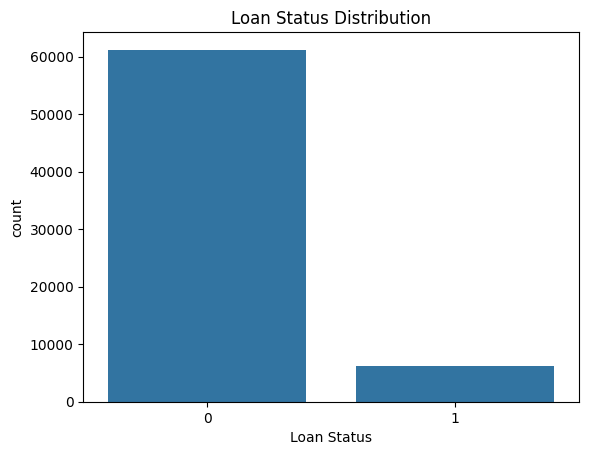

In [7]:
if train_df is not None:
    #print("Columns:", train_df.columns)
    sns.countplot(x='Loan Status', data=train_df)
    plt.title('Loan Status Distribution')
    plt.show()

In [8]:
# Function to build a normalized mapping dictionary
def build_loan_type_map(raw_mapping):
    return {key.strip().lower(): value for key, value in raw_mapping.items()}

raw_loan_type_map = {
    "Personal loan": "Personal_Loan", "Personal": "Personal_Loan", "personal": "Personal_Loan",
    "vacation": "Vacation_Loan", "Vacation": "Vacation_Loan",
    "Home buying": "Home_Loan", "Home loan": "Home_Loan", "House": "Home_Loan",
    "Home improvement": "Home_Loan", "home improvement": "Home_Loan",
    "Home Improvement": "Home_Loan", "Home Improvement Loan": "Home_Loan",
    "Bathroom": "Home_Loan", "Home": "Home_Loan",
    "Medical expenses": "Medical_Loan", "Medical": "Medical_Loan", "Medical loan": "Medical_Loan",
    "Debt Consolidation": "Debt_Consolidation_Loan", "Debt consolidation": "Debt_Consolidation_Loan",
    "DEBT CONSOLIDATION": "Debt_Consolidation_Loan", "Debt Consolidation Loan": "Debt_Consolidation_Loan",
    "Dept consolidation": "Debt_Consolidation_Loan", "Debt Consolidation 2013": "Debt_Consolidation_Loan",
    "debt consolidation loan": "Debt_Consolidation_Loan", "Loan Consolidation": "Debt_Consolidation_Loan",
    "Bill Consolidation": "Debt_Consolidation_Loan",
    "consolidate": "Consolidation_Loan", "Consolidation": "Consolidation_Loan",
    "Consolidate": "Consolidation_Loan", "Consolidated": "Consolidation_Loan",
    "consolidation loan": "Consolidation_Loan", "CONSOLIDATE": "Consolidation_Loan",
    "conso": "Consolidation_Loan", "CONSOLIDATION": "Consolidation_Loan",
    "Credit Card Consolidation": "Credit_Consolidation_Loan",
    "Credit Card consolidation": "Credit_Consolidation_Loan", "CC consolidation": "Credit_Consolidation_Loan",
    "Credit Consolidation": "Credit_Consolidation_Loan", "Card Consolidation": "Credit_Consolidation_Loan",
    "Get Debt Free": "Debt_Free", "get out of debt": "Debt_Free", "Debt payoff": "Debt_Free",
    "Debt Free": "Debt_Free", "relief": "Debt_Free", "Pay Off": "Debt_Free", "Getting Ahead": "Debt_Free",
    "Payoff": "Debt_Free", "payoff": "Debt_Free", "Bill Payoff": "Debt_Free",
    "pay off bills": "Debt_Free", "bills": "Debt_Free", "Freedom": "Debt_Free", "Debt Reduction": "Debt_Free",
    "Credit Card": "Credit_Cards", "CC": "Credit_Cards", "Credit Cards": "Credit_Cards",
    "cards": "Credit_Cards", "Cards": "Credit_Cards", "Credit Card Loan": "Credit_Cards",
    "Credit Loan": "Credit_Cards", "Credit": "Credit_Cards", "Credit Card Debt": "Credit_Cards",
    "Credit Card Paydown": "Credit_Cards", "Credit card pay off": "Credit_Cards",
    "Credit card payoff": "Credit_Cards", "credit pay off": "Credit_Cards",
    "Credit payoff": "Credit_Cards",
    "Credit card refinancing": "Refinance_Loan", "Credit Card Refi": "Refinance_Loan", "CC Refi": "Refinance_Loan",
    "CC Refinance": "Refinance_Loan", "Credit Card Refinance": "Refinance_Loan", "CC-Refinance": "Refinance_Loan",
    "Credit Card Refinance Loan": "Refinance_Loan", "Refinance Loan": "Refinance_Loan",
    "refi": "Refinance_Loan", "Refinance": "Refinance_Loan",
    "debt loan": "Other_Loans", "Debt Loan": "Other_Loans", "Loan 1": "Other_Loans",
    "loan1": "Other_Loans", "debt": "Other_Loans", "Debt": "Other_Loans", "MYLOAN": "Other_Loans",
    "My Loan": "Other_Loans", "Loan": "Other_Loans", "Green loan": "Other_Loans",
    "Wedding Loan": "Other_Loans", "Lending loan": "Other_Loans", "CC Loan": "Other_Loans",
    "Lending Club": "Other_Loans", "Pool": "Other_Loans",
    "Car financing": "CAR_LOAN", "Car Loan": "CAR_LOAN"
}
loan_type_map = {k.strip().lower(): v for k, v in raw_loan_type_map.items()}
classify_loan = lambda title: loan_type_map.get(title.strip().lower(), "NA")
# Apply to DataFrame columns
train_df['Loan_Type'] = train_df['Loan Title'].apply(classify_loan)
test_df['Loan_Type'] = test_df['Loan Title'].apply(classify_loan)

Loan_Type
Refinance_Loan               30942
Debt_Consolidation_Loan      28674
NA                            3282
Home_Loan                     2450
Consolidation_Loan             374
Credit_Cards                   323
Other_Loans                    321
Debt_Free                      272
Medical_Loan                   258
Credit_Consolidation_Loan      165
CAR_LOAN                       144
Personal_Loan                  134
Vacation_Loan                  124
Name: count, dtype: int64


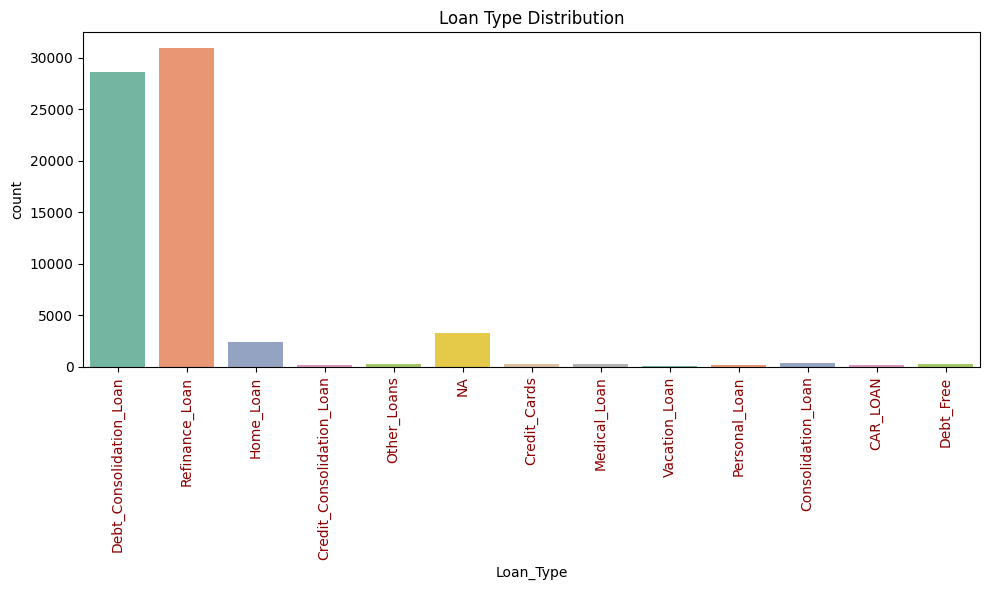

In [9]:
def plot_loan_type_distribution(df, column='Loan_Type', title='Loan Type Distribution', palette='Set2'):
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")
        return
    print(df[column].value_counts())
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=column, palette=palette)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', color='darkred')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_loan_type_distribution(train_df)

In [10]:
for dtype, cols in train_df.dtypes.groupby(train_df.dtypes).groups.items():
    print(f"Data type: {dtype}")
    print(list(cols))
    print()

Data type: int64
['ID', 'Loan Amount', 'Funded Amount', 'Term', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Total Accounts', 'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']

Data type: float64
['Funded Amount Investor', 'Interest Rate', 'Home Ownership', 'Debit to Income', 'Revolving Utilities', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee']

Data type: object
['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type', 'Loan_Type']



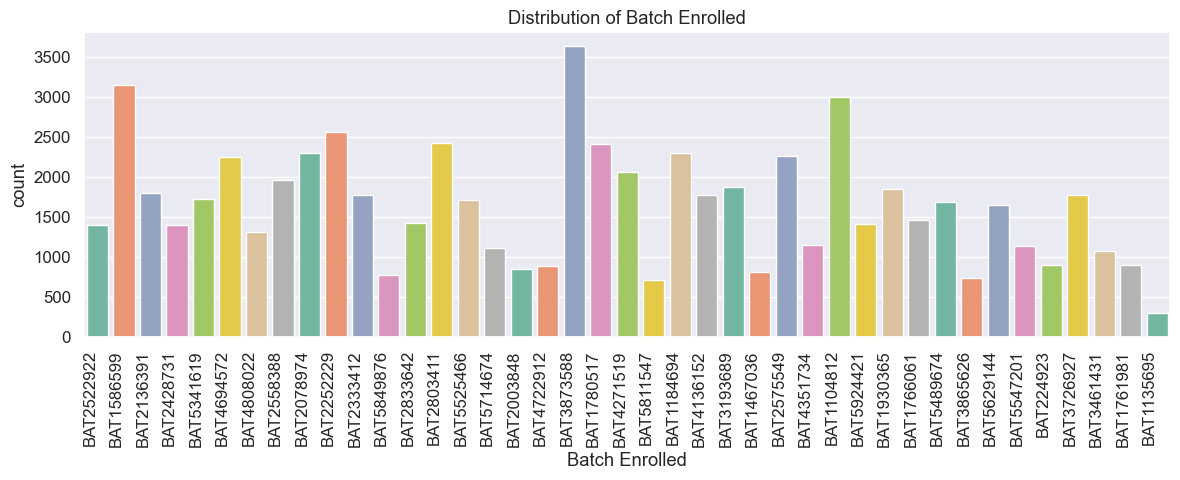

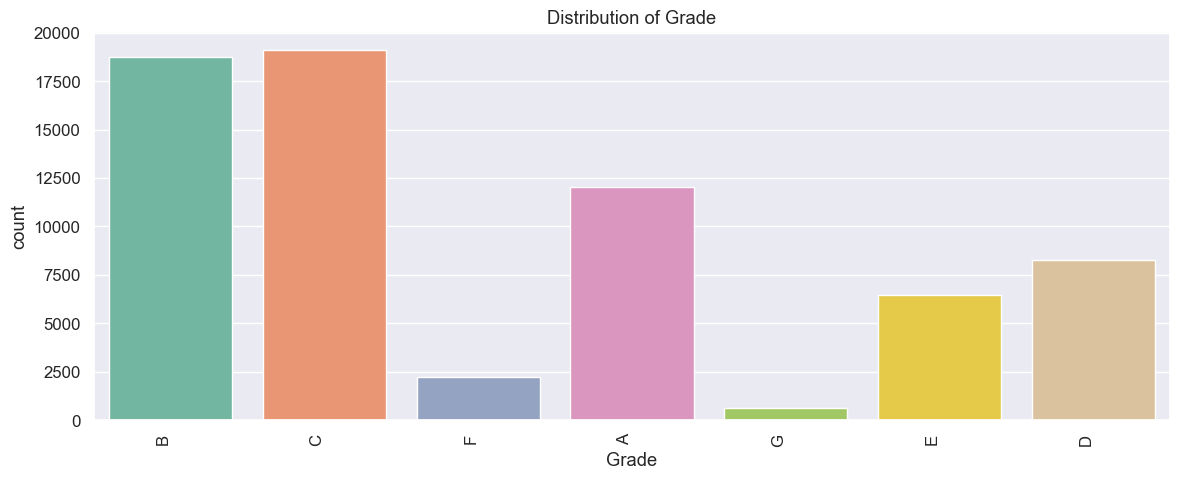

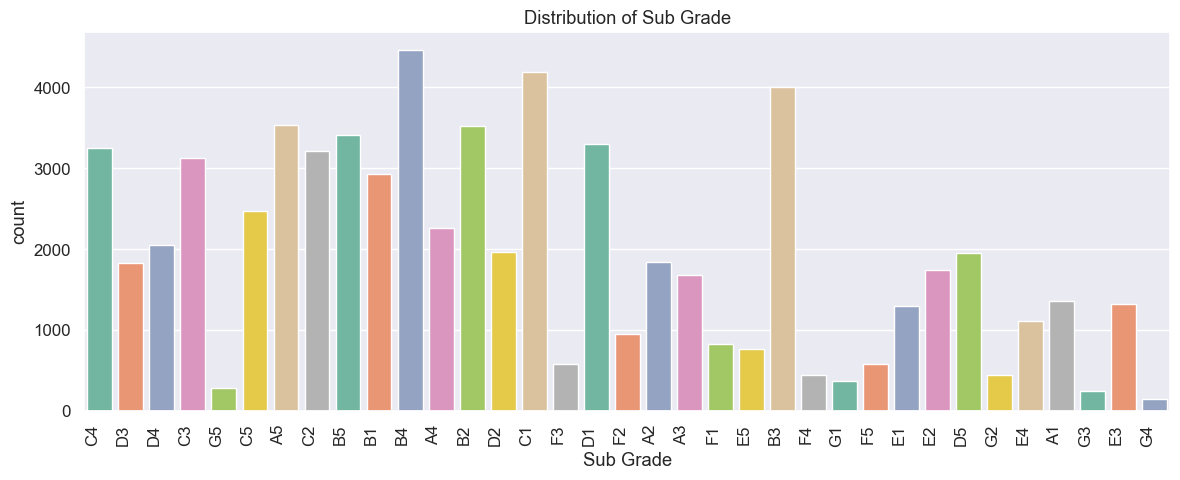

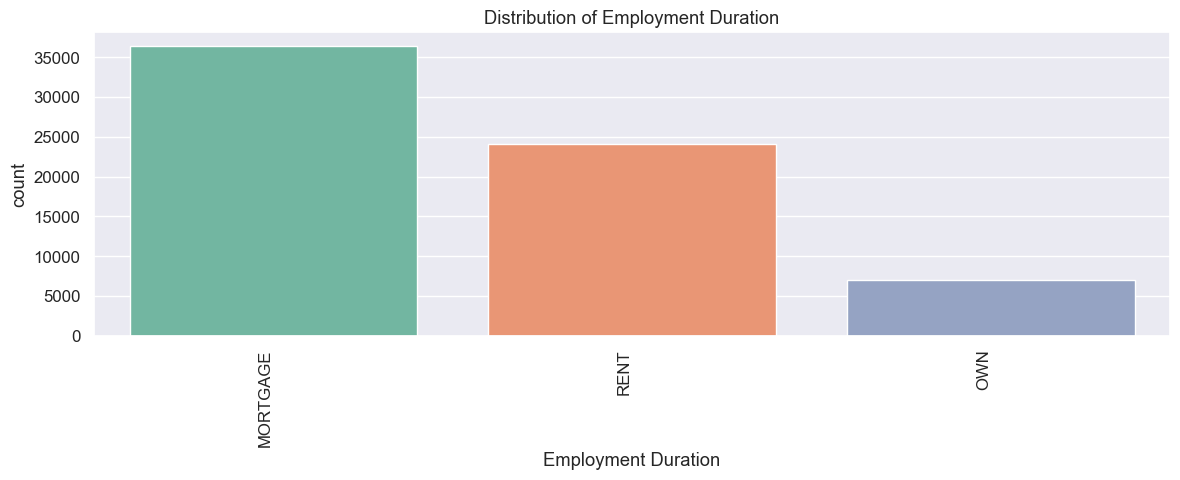

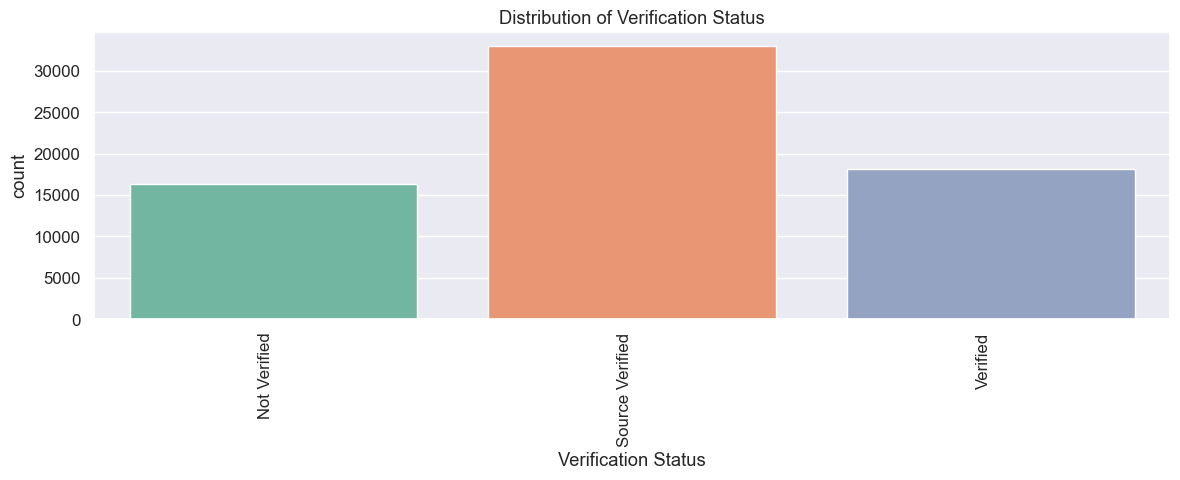

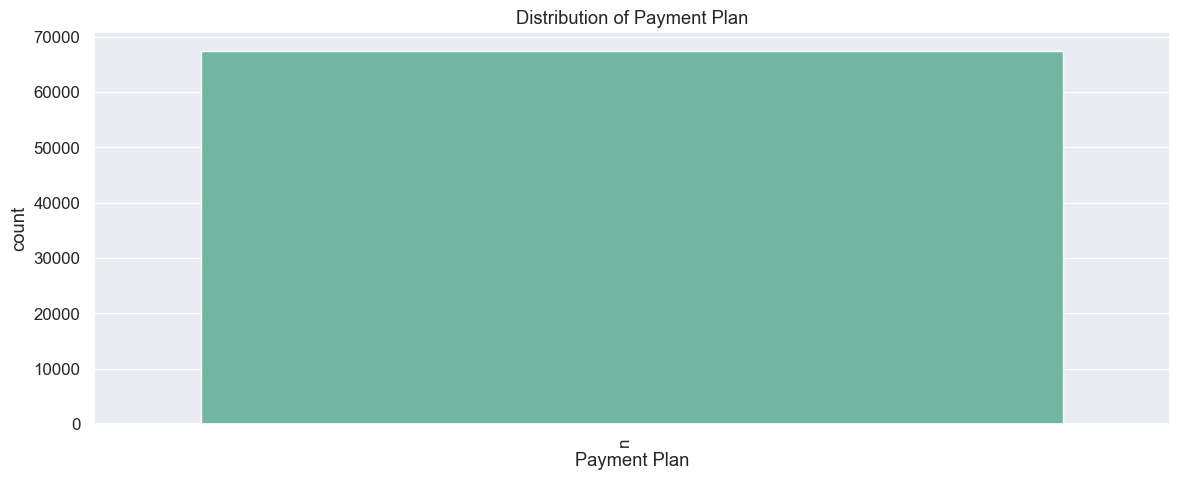

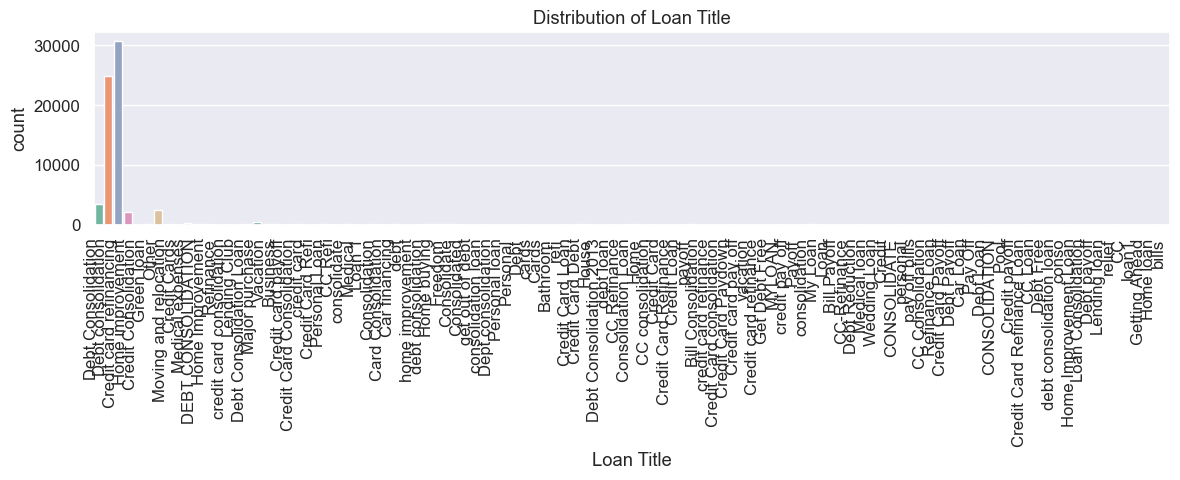

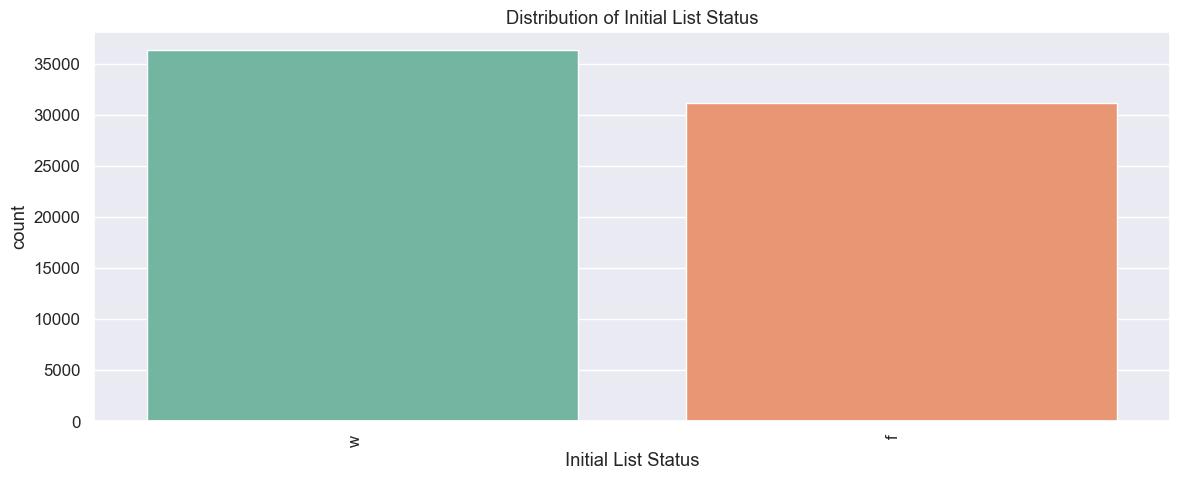

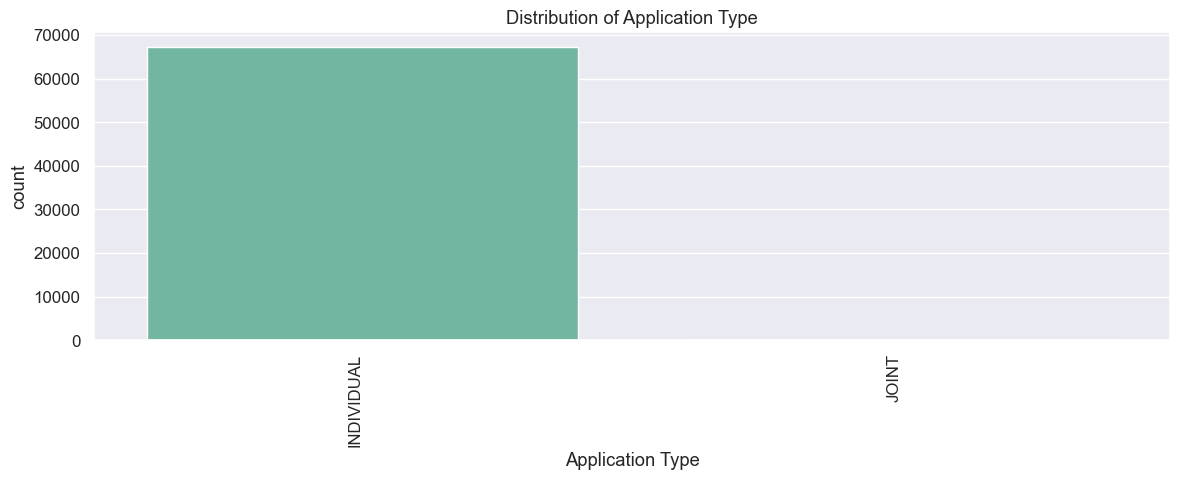

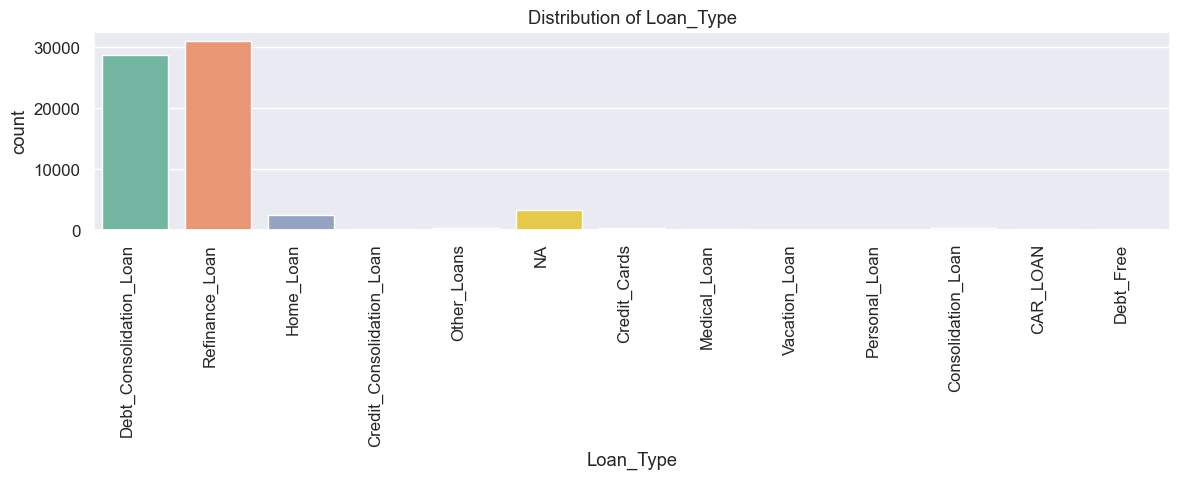

In [11]:
sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [12, 5]})
# Select all object dtype columns
cat_cols = train_df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure() 
    ax = sns.countplot(data=train_df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90, ha='right') 
    plt.tight_layout() 
    plt.show()